# ECE 657A ASSIGNMENT 1
## Iris Dataset

###### Jubilee Imhanzenobe and Olohireme Ajayi

In [47]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [48]:
# defining function for plotting correlation heatmap
def plot_heatmap(correlation):
    plt.figure(figsize=(15, 8))
    ax = sns.heatmap(correlation,annot=True,fmt='.3f',linewidths=0.3,annot_kws={"size": 18})
    plt.xticks(fontsize=12) 
    plt.yticks(fontsize=12) 
    plt.title('Correlation between features', fontsize=20)
    ax.figure.axes[-1].tick_params(labelsize=18) # To increase fontsize of colorbar ticks
    lim = len(correlation.columns)
    ax.set_ylim([0,lim]) # to make the map display correctly without trimming the edges
    plt.show()
    return

In [49]:
# importing the dataset
data = pd.read_csv("iris_dataset_missing.csv")

## Question 1

### CM1

##### Plotting the pairs plot

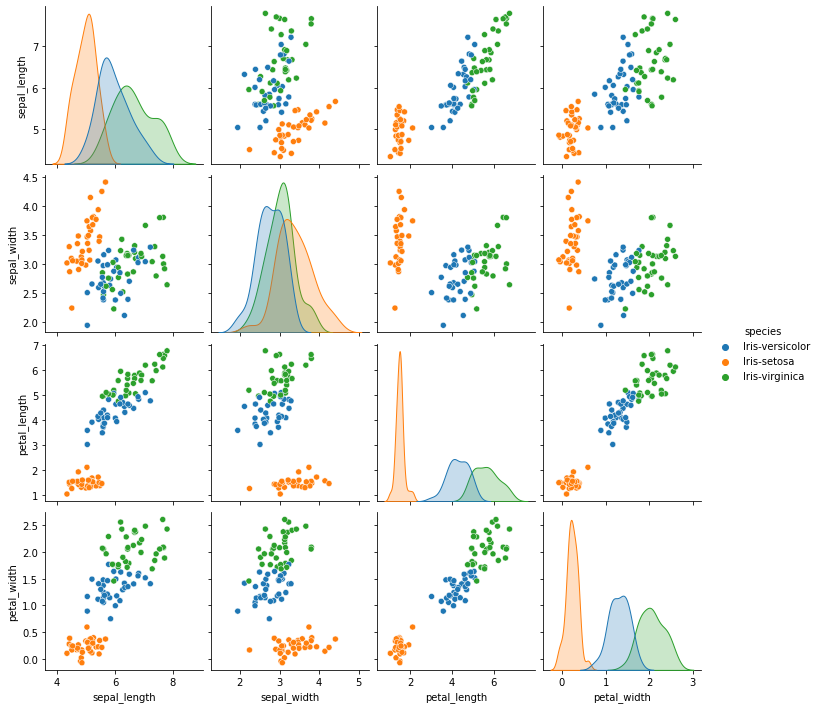

In [50]:
sns.pairplot(data, hue="species")

### CM2

##### Reporting the correlation coefficient for selected features

In [51]:
# changing species from object to int
data.species.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}, inplace = True)

In [52]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,1
1,6.325517,2.115481,4.542052,1.413651,1
2,5.257497,3.814303,1.470660,0.395348,0
3,6.675168,3.201700,5.785461,2.362764,2
4,5.595237,2.678166,4.077750,1.369266,1


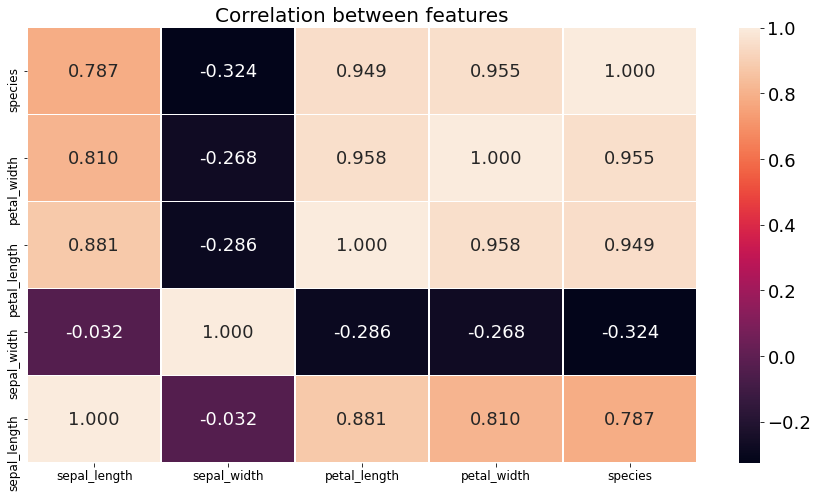

In [53]:
plot_heatmap(data.corr())

- petal_width has the highest correlation with the target (0.955)
- sepal_width has a negative correlation with the target (-0.324)
- sepal_width has the lowest correlation with the target (-0.324)
- petal_width, petal_length and sepal_length have positive correlation with the target
- the highest interfeature correlation is 0.958 and it exists between petal_width and petal_length.
- the lowest interfeature correlation is -0.032 and it exists between sepal_width and sepal_length.

##### Calculating the mean, variance, skew, kurtosis for the datasets

In [54]:
# comparing for the entire dataset
for column in data.iloc[:,:-1].columns:
    mean = round(data[column].mean(), 2)
    variance = round(data[column].var(), 2)
    skew = round(data[column].skew(), 2)
    kurtosis = round(data[column].kurt(), 2)
    print("***", column.title(), "***")
    print("Mean -", mean)
    print("Variance -", variance)
    print("Skew -", skew)
    print("Kurtosis -", kurtosis)
    print()

*** Sepal_Length ***
Mean - 5.86
Variance - 0.74
Skew - 0.4
Kurtosis - -0.54

*** Sepal_Width ***
Mean - 3.06
Variance - 0.21
Skew - 0.37
Kurtosis - 0.51

*** Petal_Length ***
Mean - 3.81
Variance - 3.22
Skew - -0.26
Kurtosis - -1.39

*** Petal_Width ***
Mean - 1.2
Variance - 0.62
Skew - -0.07
Kurtosis - -1.32



In [55]:
# comparing for the different target
for specie in data["species"].unique():
    print("*** Specie = ", ['Iris-setosa','Iris-versicolor','Iris-virginica'][specie], "***")
    for column in data.iloc[:,:-1].columns:
        mean = round(data[data['species'] == specie][column].mean(), 2)
        variance = round(data[data['species'] == specie][column].var(), 2)
        skew = round(data[data['species'] == specie][column].skew(), 2)
        kurtosis = round(data[data['species'] == specie][column].kurt(), 2)
        print(column, "Mean -", mean)
        print(column, "Variance -", variance)
        print(column, "Skew -", skew)
        print(column, "Kurtosis -", kurtosis)
        print()

*** Specie =  Iris-versicolor ***
sepal_length Mean - 5.95
sepal_length Variance - 0.29
sepal_length Skew - 0.56
sepal_length Kurtosis - -0.16

sepal_width Mean - 2.76
sepal_width Variance - 0.11
sepal_width Skew - -0.42
sepal_width Kurtosis - -0.21

petal_length Mean - 4.28
petal_length Variance - 0.25
petal_length Skew - -0.37
petal_length Kurtosis - -0.22

petal_width Mean - 1.31
petal_width Variance - 0.05
petal_width Skew - -0.26
petal_width Kurtosis - -0.22

*** Specie =  Iris-setosa ***
sepal_length Mean - 4.99
sepal_length Variance - 0.12
sepal_length Skew - -0.08
sepal_length Kurtosis - -0.69

sepal_width Mean - 3.38
sepal_width Variance - 0.2
sepal_width Skew - 0.19
sepal_width Kurtosis - 0.59

petal_length Mean - 1.48
petal_length Variance - 0.04
petal_length Skew - 0.97
petal_length Kurtosis - 3.32

petal_width Mean - 0.23
petal_width Variance - 0.02
petal_width Skew - 0.06
petal_width Kurtosis - 1.0

*** Specie =  Iris-virginica ***
sepal_length Mean - 6.64
sepal_length Va

##### Nature of the data and observations

### CM3

##### Checking for outliers

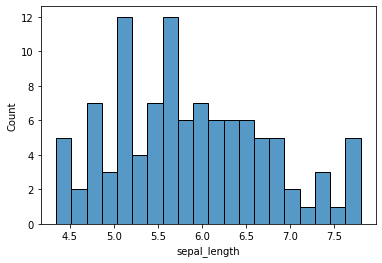

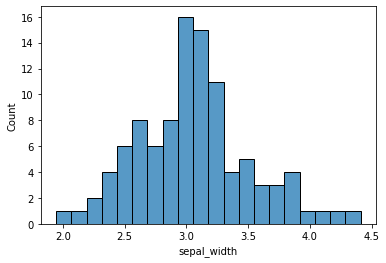

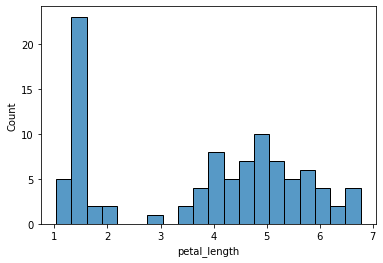

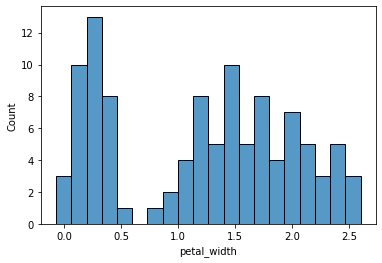

In [56]:
# Using histogram
for column in data.iloc[:,:-1].columns:
    plt.figure()
    sns.histplot(data = data, x = column, bins = 20)
    plt.show()

from the histogram plots,
- There are few outliers in petal width with values less than 0
- There are also a few outliers in petal_length

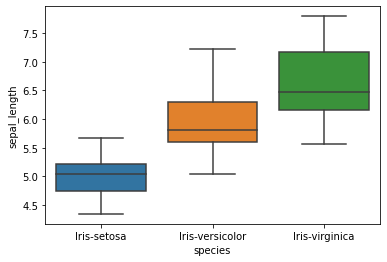

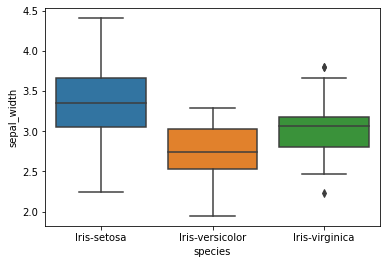

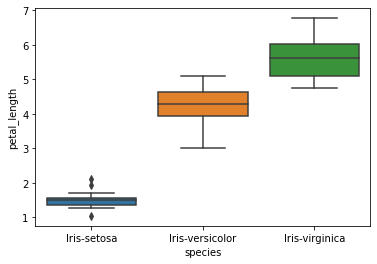

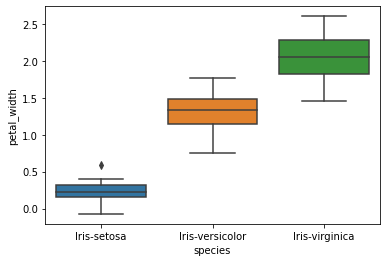

In [57]:
# finer detection using box plot
for column in data.columns[:-1]:
    plt.figure()
    ax = sns.boxplot(x="species", y=column, data=data)
    ax.set_xticks(range(3))
    ax.set_xticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica'])
    plt.show()

From the boxplot
- There are outliers in sepal_width of the Iris-virginica specie
- There are outliers in petal_length and petal_width of the Iris-setosa specie

In [58]:
# Handling negative values in petal_width by replacing with nan
for index in data[data["petal_width"] < 0].index:
    data.loc[index, "petal_width"] = np.nan 

In [59]:
# Handling Outliers by replacing them with nan
outliers_dict = {"sepal_width":2, "petal_length":0, "petal_width":0}
for column, specie in outliers_dict.items():
    Q1 = data[column][data["species"] == specie].quantile(0.25)
    Q3 = data[column][data["species"] == specie].quantile(0.75)
    IQR = Q3 - Q1 #Interquartile range
    fence_low = Q1 - (1.5 * IQR)
    fence_high = Q3 + (1.5 * IQR)
    
    df2 = pd.DataFrame(data[data['species'] == specie][column])
    
    for index in df2[df2[column] < fence_low].index:
        data.loc[index, column] = np.nan
    for index in df2[df2[column] > fence_high].index:
        data.loc[index, column] = np.nan

The outliers in the data were values lower than their group lower fence or values higher than the higher fence and these have been replaced with nan values 

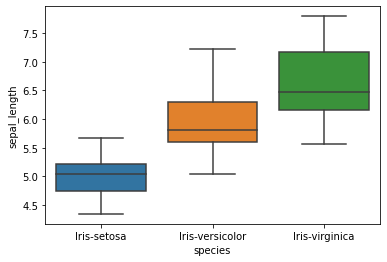

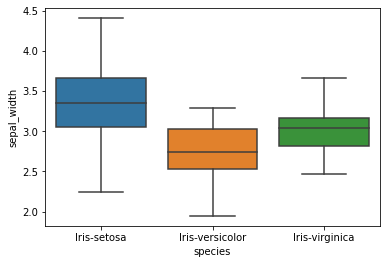

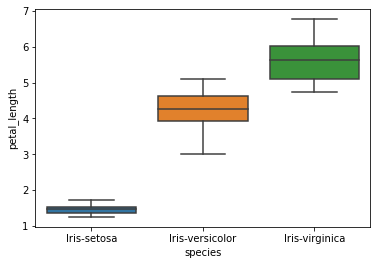

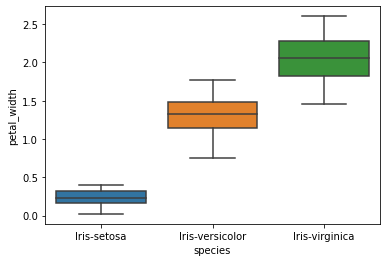

In [60]:
# Replotting box plot to confirm outlier removal
for column in data.columns[:-1]:
    plt.figure()
    ax = sns.boxplot(x="species", y=column, data=data)
    ax.set_xticks(range(3))
    ax.set_xticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica'])
    plt.show()

The new boxplot show that the outliers in the data have been removed

### CM5

##### Data Cleaning

In [61]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,1
1,6.325517,2.115481,4.542052,1.413651,1
2,5.257497,3.814303,1.470660,0.395348,0
3,6.675168,3.201700,5.785461,2.362764,2
4,5.595237,2.678166,4.077750,1.369266,1


###### Reducing noise in the data

In [62]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,1
1,6.325517,2.115481,4.542052,1.413651,1
2,5.257497,3.814303,1.470660,0.395348,0
3,6.675168,3.201700,5.785461,2.362764,2
4,5.595237,2.678166,4.077750,1.369266,1


In [63]:
# checking for missing values in columns
for column in data.columns:
    print(column.upper(), "-", data[column].isna().sum())

SEPAL_LENGTH - 0
SEPAL_WIDTH - 7
PETAL_LENGTH - 11
PETAL_WIDTH - 3
SPECIES - 0


In [64]:
# checking for missing values in rows
for i in range(len(data)):
    row = data.iloc[i, :]
    if row.isna().sum() > 0:
        print(i , ": ", row.isna().sum())

6 :  1
7 :  1
21 :  1
30 :  1
32 :  1
37 :  1
38 :  1
39 :  1
41 :  1
42 :  1
46 :  1
50 :  1
54 :  1
64 :  1
65 :  1
67 :  1
77 :  1
79 :  2
80 :  1
85 :  1


- for the different features, petal_lenght has the highest number of missing values
- no row has more than 2 missing value so we can use estimation method for the missing values. If any row had more than 2 missing values, the row would have been dropped

In [65]:
# Handling missing values for numeric features
group_mean = data.groupby("species").mean()
for column in data.columns[:-1]:
    for index in data[data[column].isna()].index:
        specie = data.iloc[index,-1]
        data.loc[index, column] = round(group_mean[column][specie], 2)

The approximation method used in replacing missing values was using the mean of the feature grouped by the specie since all the features are numeric.

##### Plotting the correlation plot to see the effect of data cleaning on the dataset

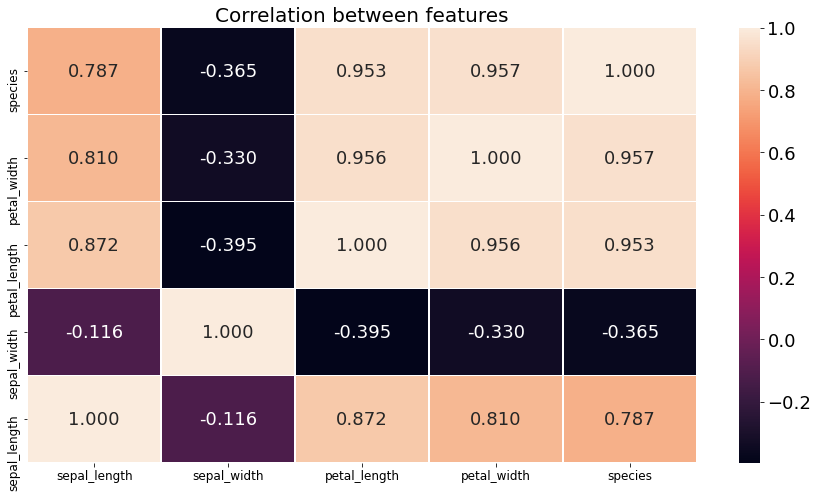

In [66]:
plot_heatmap(data.corr())

After Data cleaning
- The correlation between petal_width and species increased from 0.955 to 0.957
- The correlation between petal_length and species increased from 0.949 to 0.953
- The correlation between sepal_width and species increased from -0.324 to -0.365
- The correlation between sepal_length and species remained unchanged

## Question 2 

### Building the KNN Model

In [67]:
#data = data.round(2)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,1
1,6.325517,2.115481,4.542052,1.413651,1
2,5.257497,3.814303,1.470660,0.395348,0
3,6.675168,3.201700,5.785461,2.362764,2
4,5.595237,2.678166,4.077750,1.369266,1


In [68]:
# separating ths dataset into matrix of features and target
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Splitting the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=275)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=275)

In [69]:
# Developing the Classification Model
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

# Predicting the test set result
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)

# Evaluating the Model
cm = confusion_matrix(y_test,y_pred)

accuracy_1 = round(100 * accuracy_score(y_test,y_pred), 2)
f1_score_1 = round(f1_score(y_test, y_pred, average = "weighted"), 2)
auc_1 = round(roc_auc_score(y_test, y_prob, average = "macro", multi_class = "ovo"), 2)

y_pred_train  = classifier.predict(X_train)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, y_pred_train), 2))
print("F1_score: ", round(f1_score(y_train, y_pred_train, average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, classifier.predict_proba(X_train), average = "macro", multi_class = "ovo"), 2))
print()
print("Test Set Evaluation")
print("Accuracy: ", accuracy_1)
print("F1_score: ", f1_score_1)
print("AUC: ", auc_1)

Training Set Evaluation
Accuracy:  95.24
F1_score:  0.95
AUC:  1.0

Test Set Evaluation
Accuracy:  100.0
F1_score:  1.0
AUC:  1.0


##### Finding best parameter by tuning k

In [70]:
k_list = [1,5,10,15,20,25,30,35]

accuracy = {}
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    
    # Predicting the test set result
    y_pred = classifier.predict(X_val)
    
    model_accuracy = accuracy_score(y_val, y_pred)
    
    accuracy[k] = round(model_accuracy * 100, 2)

### CM6

<AxesSubplot:>

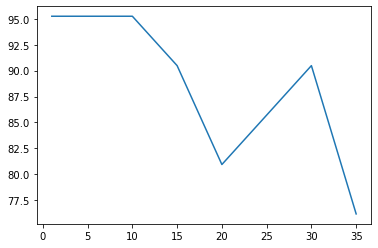

In [71]:
# plotting the parameter vs accuracy graph
sns.lineplot(x = k_list, y = accuracy.values())

The highest accuracy accurs at k = {1, 5, 10} but we will select k = 10 as the optimal k because in KNN, a small value of k will make our model highly susceptible to noise which will cause high variations in the performance of the model on different sets of unobserved data and a high value of k wil lead to higher computational cost.

##### Building the model with optimal k

In [72]:
k_opt = 10

classifier = KNeighborsClassifier(n_neighbors = k_opt)
classifier.fit(X_train,y_train)

# Predicting the test set result
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)

# Evaluating the model
accuracy_2 = round(100 * accuracy_score(y_test, y_pred), 2)
f1_score_2 = round(f1_score(y_test, y_pred, average = "weighted"), 2)
auc_2 = round(roc_auc_score(y_test, y_prob, average = "macro", multi_class = "ovo"), 2)

print("Test Set Evaluation")
print("Accuracy: ", accuracy_2)
print("F1_score: ", f1_score_2)
print("AUC: ", auc_2)
print()
print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, classifier.predict(X_train)), 2))
print("F1_score: ", round(f1_score(y_train, classifier.predict(X_train), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, classifier.predict_proba(X_train), average = "macro", multi_class = "ovo"), 2))
print()
print("Validation Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_val, classifier.predict(X_val)), 2))
print("F1_score: ", round(f1_score(y_val, classifier.predict(X_val), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_val, classifier.predict_proba(X_val), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  95.24
F1_score:  0.95
AUC:  1.0

Training Set Evaluation
Accuracy:  95.24
F1_score:  0.95
AUC:  1.0

Validation Set Evaluation
Accuracy:  95.24
F1_score:  0.95
AUC:  1.0


##### Improving the model

In [73]:
# Normalizing numerical features
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

The normalization teschnique used is z-score normalization which modifies the data to have a mean of 0 and a standard deviation of 1 thus making the aggregate data have the properties of a normal distribution.

##### parameter tuning of weight and distance metrics

In [74]:
# finding optimal distance metric
weights = ["uniform", "distance"]
distance_metrics = [1, 2]
evaluation = []

for weight in weights:
    for p in distance_metrics:     
        classifier = KNeighborsClassifier(n_neighbors = k_opt, weights = weight, p = p)
        classifier.fit(X_train,y_train)

        # Testing on the validation set
        y_pred = classifier.predict(X_val)     
        y_prob = classifier.predict_proba(X_val)

        # Evaluating the model
        accuracy_3 = round(100 * accuracy_score(y_val, y_pred), 2)
        f1_score_3 = round(f1_score(y_val, y_pred, average = "weighted"), 2)
        auc_3 = round(roc_auc_score(y_val, y_prob, average = "macro", multi_class = "ovo"), 2)
        
        evaluation.append({'weight':weight, 'p':p, 'accuracy':accuracy_3, 'F1':f1_score_3, 'AUC':auc_3})

In [75]:
for eval in evaluation:
    print(eval)

{'weight': 'uniform', 'p': 1, 'accuracy': 85.71, 'F1': 0.85, 'AUC': 0.99}
{'weight': 'uniform', 'p': 2, 'accuracy': 80.95, 'F1': 0.8, 'AUC': 0.98}
{'weight': 'distance', 'p': 1, 'accuracy': 95.24, 'F1': 0.95, 'AUC': 1.0}
{'weight': 'distance', 'p': 2, 'accuracy': 95.24, 'F1': 0.95, 'AUC': 0.99}


##### Building the optimized model  (uniform weight and manhattan distance)

In [76]:
classifier = KNeighborsClassifier(n_neighbors = k_opt, weights = "distance", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

### CM7

In [77]:
# Predicting the test set result with optimized model
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)

# Evaluating the model
accuracy_4 = round(100 * accuracy_score(y_test, y_pred), 2)
f1_score_4 = round(f1_score(y_test, y_pred, average = "weighted"), 2)
auc_4 = round(roc_auc_score(y_test, y_prob, average = "macro", multi_class = "ovo"), 2)

print("Test Set Evaluation")
print("Accuracy: ", accuracy_4)
print("F1_score: ", f1_score_4)
print("AUC: ", auc_4)
print()
print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train, classifier.predict(X_train)), 2))
print("F1_score: ", round(f1_score(y_train, classifier.predict(X_train), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_train, classifier.predict_proba(X_train), average = "macro", multi_class = "ovo"), 2))
print()
print("Validation Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_val, classifier.predict(X_val)), 2))
print("F1_score: ", round(f1_score(y_val, classifier.predict(X_val), average = 'weighted'), 2))
print("AUC: ", round(roc_auc_score(y_val, classifier.predict_proba(X_val), average = "macro", multi_class = "ovo"), 2))

Test Set Evaluation
Accuracy:  95.24
F1_score:  0.95
AUC:  1.0

Training Set Evaluation
Accuracy:  100.0
F1_score:  1.0
AUC:  1.0

Validation Set Evaluation
Accuracy:  95.24
F1_score:  0.95
AUC:  0.99


# Kaggle Competition Prediction

In [78]:
# Importing the test data
train_data = pd.read_csv("iris_train.csv")
test_data = pd.read_csv("iris_test.csv")

In [79]:
test_data.head()

,id,sepal_length,sepal_width,petal_length,petal_width
0,0,7.3,2.9,6.3,1.8
1,1,6.1,2.9,4.7,1.4
2,2,6.3,2.8,5.1,1.5
3,3,6.3,3.3,4.7,1.6
4,4,6.1,3.0,4.9,1.8


In [80]:
X_train_data = X
y_train_data = y

In [81]:
X_test_data = test_data.iloc[:,1:].values

In [82]:
# Normalizing numerical features
X_scaler = StandardScaler()
X_train_data = X_scaler.fit_transform(X_train_data)
X_test_data = X_scaler.transform(X_test_data)

In [83]:
# Building the model
classifier = KNeighborsClassifier(n_neighbors = k_opt, weights = "distance", p = 2)
classifier.fit(X_train_data, y_train_data)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [84]:
# Training set accuracy
y_pred_train_data  = classifier.predict(X_train_data)

print("Training Set Evaluation")
print("Accuracy: ", round(100 * accuracy_score(y_train_data, y_pred_train_data), 2))
print("F1_score: ", round(f1_score(y_train_data, y_pred_train_data, average = 'weighted'), 2))

Training Set Evaluation
Accuracy:  100.0
F1_score:  1.0


In [85]:
y_pred_data = classifier.predict(X_test_data)

In [86]:
result = pd.DataFrame(columns=['id','species'])
result['id'] = test_data['id']
result['species'] = y_pred_data

result.set_index(keys='id', inplace=True)

result.to_csv('submission.csv')